# SVD demo

IAM 961 *Numerical Linear Algebra* University of New Hampshire, J. Gibson 2025-09-17

This Julia notebook demonstrates some key geometric properties of the singular value decomposition (SVD) using a 2d example, 
i.e. a $2 \times 2$ matrix that acts as a transformation on $\mathbb{R}^2$. 

The SVD of a matrix $A$ is a factorization of the form $A = U \Sigma V^*$, where $U$ and $V$ are unitary and $\Sigma$ is diagonal, with non-negative and non-increasing diagonal elements. Key points illustrated here

 * The columns of $V$ form an orthonormal basis for the domain of the map $x \rightarrow Ax$
 * The columns of $U$ form an orthonormal basis for the range of the same map.
 * $A$ maps the columns of $V$ into the columns of $U$, scaled by the singular values $\sigma$, according to $A v_j = \sigma_j u_j$.
 * $A$ maps the unit circle into an ellipsoid.
 * The principle axes of the ellipsoid are $\sigma_j u_j$, the scaled columns of $U$.
 * The columns of $V$ are the preimages of these principle axes under the map $x \rightarrow Ax$, i.e. $v_j = A^{-1} (\sigma_j u_j)$.
 
 

In [1]:
using Plots
using LinearAlgebra
#using LaTeXStrings

In [2]:
# define a few convenience plotting functions
function plotvector!(x, clr="black", lbl="")
    plot!([0; x[1]], [0; x[2]], color=clr, arrow=:arrow, label=lbl)
    plot!(xlabel="x₁", ylabel="x₂")
end

function plotvector(x, clr="black", lbl="")
    plot() # wipe out previous plot
    plotvector!(x, clr, lbl)
end

plotvector (generic function with 3 methods)

## Illustrate map $x \rightarrow Ax$

In [3]:
# construct some unit vector x
x = [-1; 1]
x = x/norm(x)

2-element Vector{Float64}:
 -0.7071067811865475
  0.7071067811865475

In [4]:
# define a matrix
A = [1 2 ; 0 2]

2×2 Matrix{Int64}:
 1  2
 0  2

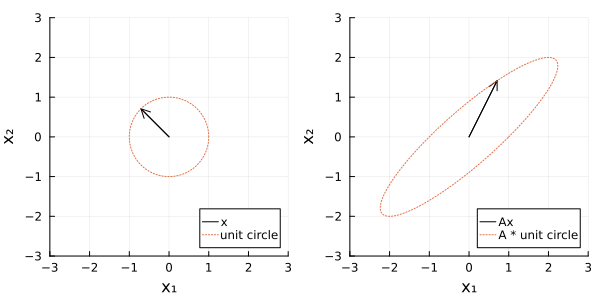

In [5]:
# construct unit circle
θ = range(0, 2π, length=100)
C = [cos.(θ) sin.(θ)]'

# Left plot: x and unit circle 
plotvector(x, "black", "x")
plot!(C[1,:], C[2,:], linestyle=:dot,label="unit circle")
p1 = plot!(xlim=(-3,3), ylim=(-3,3), aspect_ratio=1, legend=:bottomright)

# Right plot: x and the circle transformed by A
AC = A*C
Ax = A*x

plotvector(Ax, "black", "Ax")
plot!(AC[1,:], AC[2,:], linestyle=:dot,label="A * unit circle")
p2 = plot!(xlim=(-3,3), ylim=(-3,3), aspect_ratio=1, legend=:bottomright)

plot(p1,p2, size=(600,300))

## Compute and verify SVD

In [6]:
# compute SVD of A
(U,σ,V) = svd(A);

In [7]:
U

2×2 Matrix{Float64}:
 0.749678  -0.661803
 0.661803   0.749678

In [8]:
σ

2-element Vector{Float64}:
 2.9208096264818897
 0.6847416489820998

In [9]:
V

2×2 adjoint(::Matrix{Float64}) with eltype Float64:
 0.256668  -0.9665
 0.9665     0.256668

In [10]:
# verify that U Σ V' = A (here ' means hermitian conjugate)
U*diagm(σ)*V'

2×2 Matrix{Float64}:
 1.0          2.0
 5.55112e-17  2.0

In [11]:
A

2×2 Matrix{Int64}:
 1  2
 0  2

In [12]:
A - U*diagm(σ)*V'

2×2 Matrix{Float64}:
  0.0          0.0
 -5.55112e-17  0.0

In [13]:
norm(A - U*diagm(σ)*V')

5.551115123125783e-17

## Plot left and right singular vectors

Recall that $u_j = 1/\sigma_j \; A v_j$ or $\sigma_j u_j = A v_j$. Thus the scaled columns of $U$ are
the images of the columns of $V$ under the transformation $x \rightarrow Ax$.

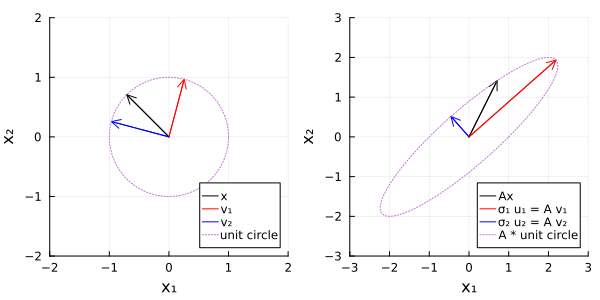

In [14]:
# Left plot: columns of V with unit circle and x vector
plotvector(x,"black", "x")
plotvector!(V[:,1], "red", "v₁")
plotvector!(V[:,2], "blue", "v₂")
plot!(xlim=(-2,2), ylim=(-2,2), aspect_ratio=1, legend=:bottomright)
p1=plot!(C[1,:], C[2,:], linestyle=:dot,label="unit circle")

# Right plot: columns of U scaled by σ with A times unit circle and A times x.
# Note that the scaled columns of U are the principle axes of the ellipsoid.

plotvector(Ax,"black", "Ax")
plotvector!(σ[1]*U[:,1], "red",  "σ₁ u₁ = A v₁")
plotvector!(σ[2]*U[:,2], "blue", "σ₂ u₂ = A v₂")
plot!(xlim=(-3,3), ylim=(-3,3), aspect_ratio=1, legend=:bottomright)
p2 = plot!(AC[1,:], AC[2,:], linestyle=:dot,label="A * unit circle")

plot(p1,p2, size=(600,300))

In [15]:
U

2×2 Matrix{Float64}:
 0.749678  -0.661803
 0.661803   0.749678

In [16]:
U' # hermitian conjugate

2×2 adjoint(::Matrix{Float64}) with eltype Float64:
  0.749678  0.661803
 -0.661803  0.749678

In [17]:
U' * U

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

In [18]:
V' * V

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

## Calculate Ax as sum of $\sigma_j \, u_j v_j^* \,x$

\begin{equation*}
A = \sum_j \sigma_j u_j v_j^*
\end{equation*}

In [19]:
A

2×2 Matrix{Int64}:
 1  2
 0  2

In [20]:
σ[1]*U[:,1]*(V[:,1]') + σ[2]*U[:,2]*(V[:,2]')

2×2 Matrix{Float64}:
 1.0          2.0
 5.55112e-17  2.0

In [21]:
A*x

2-element Vector{Float64}:
 0.7071067811865475
 1.414213562373095

In [22]:
σ[1]*U[:,1]*(V[:,1]'*x) + σ[2]*U[:,2]*(V[:,2]'*x)

2-element Vector{Float64}:
 0.7071067811865476
 1.414213562373095

### Comparison of SVD to eigenvalues, eigenvectors

In [23]:
eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 1.0
 2.0
vectors:
2×2 Matrix{Float64}:
 1.0  0.894427
 0.0  0.447214

In [24]:
σ

2-element Vector{Float64}:
 2.9208096264818897
 0.6847416489820998